In [1]:
# visualize GMET outputs

import numpy as np
import matplotlib.pyplot as plt
import imageio, os, glob

In [2]:

data1 = np.load('./Andy_test_case1/output_20170201-20170215.npz')
data2 = np.load('./Andy_test_case1/output_20170201-20170215_GMETstyle_error.npz')

/var/folders/pf/n30tfn0j0n93dr81jm369hyc0000gp/T/ipykernel_23474/3008563084.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


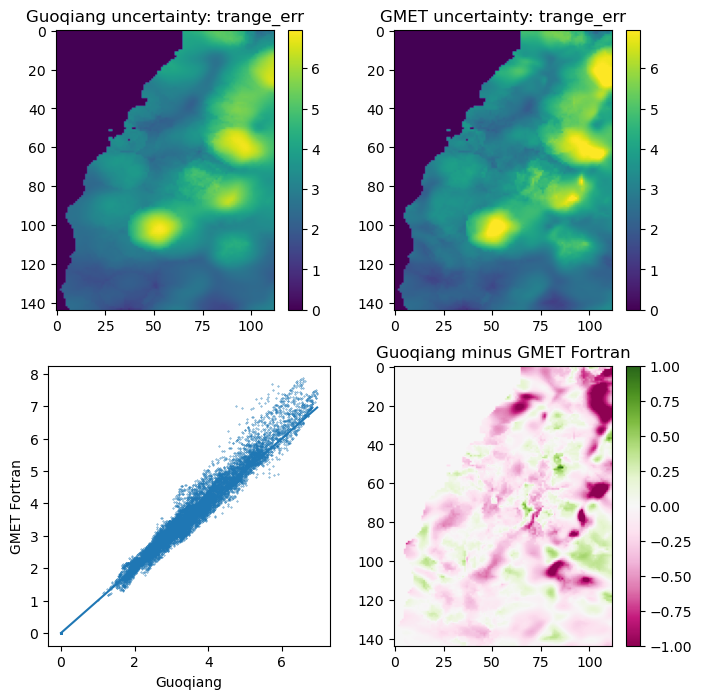

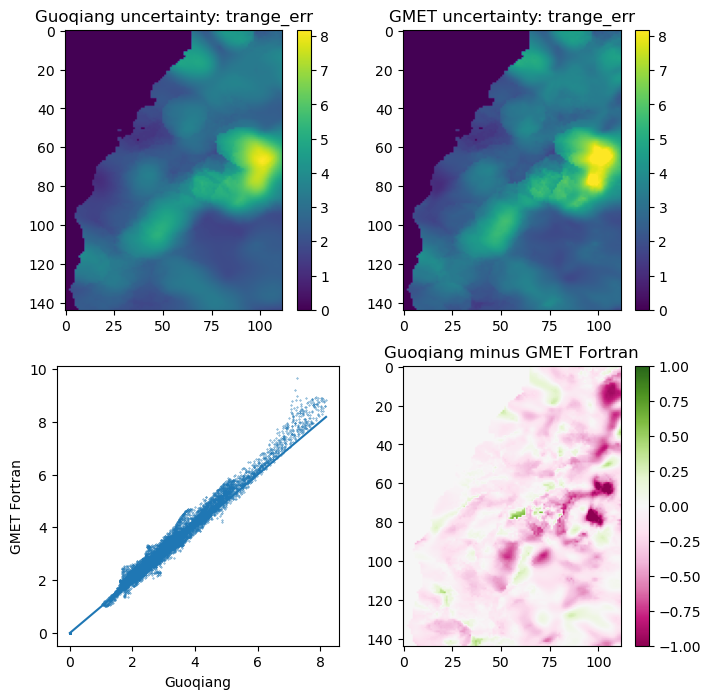

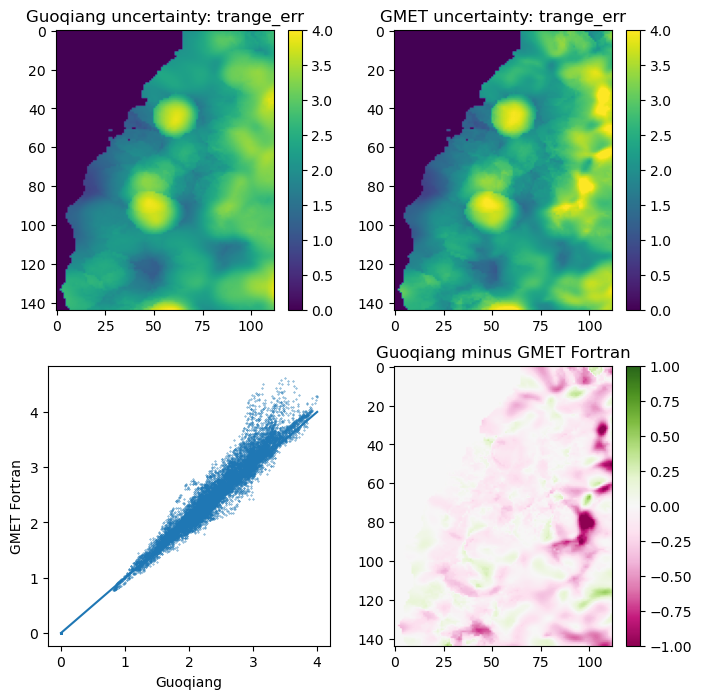

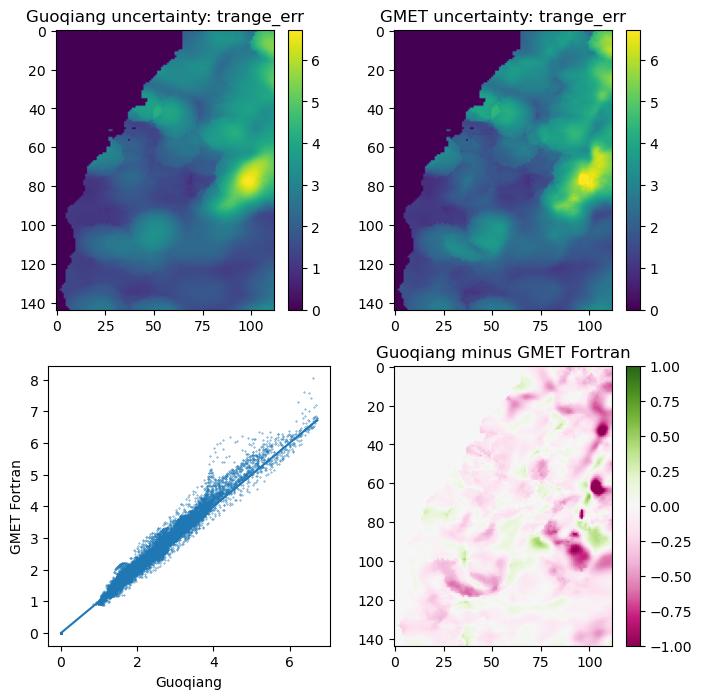

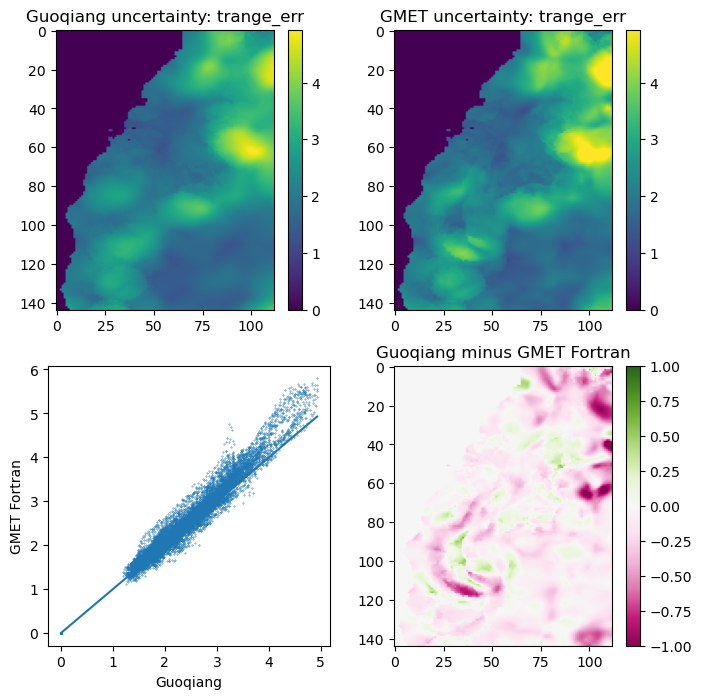

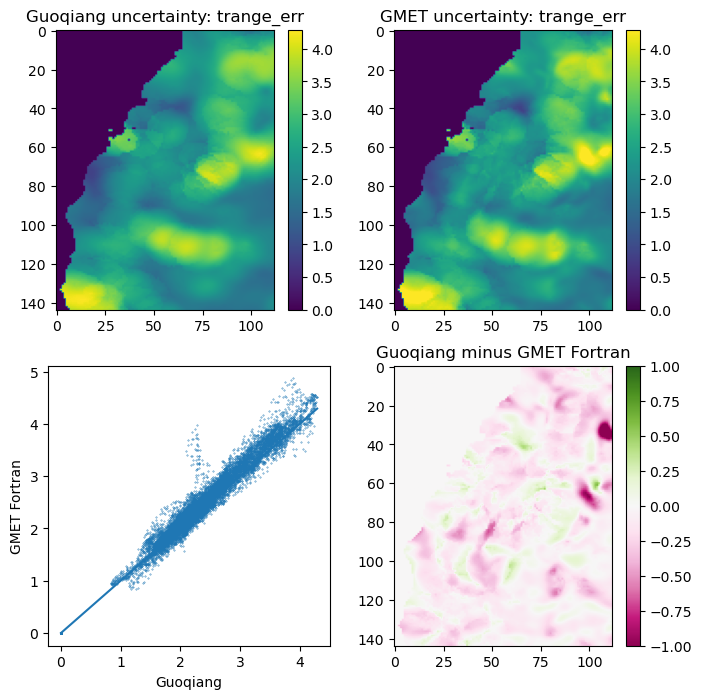

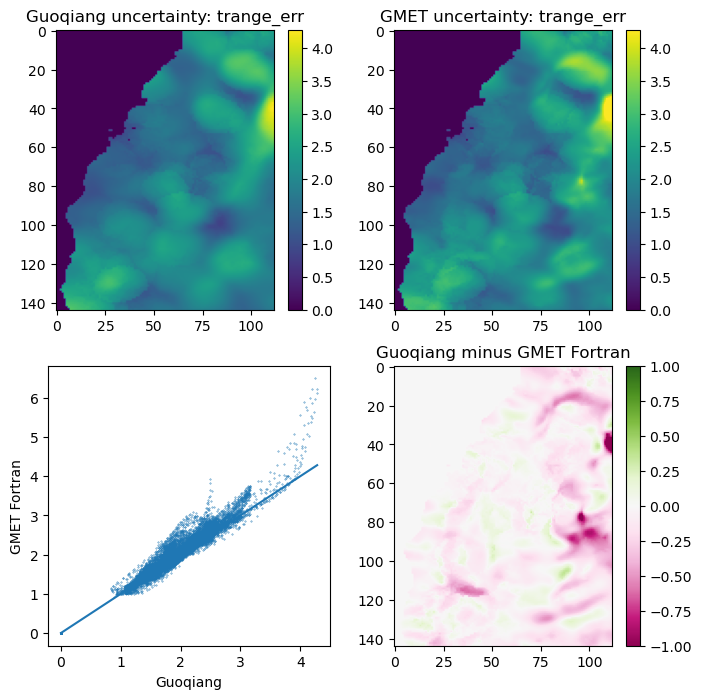

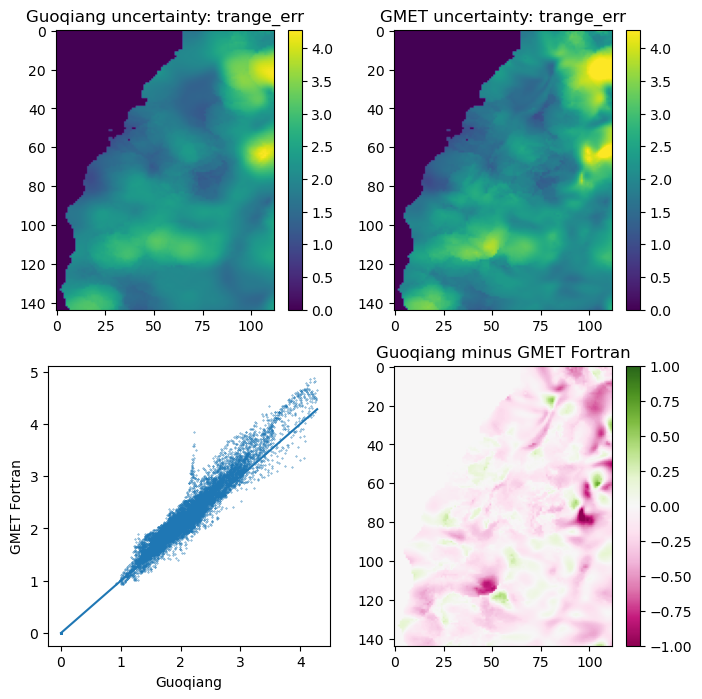

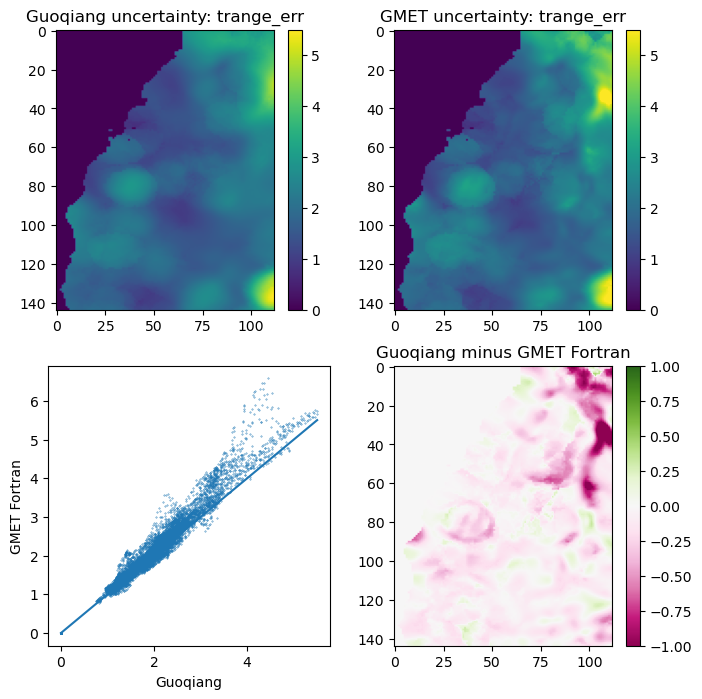

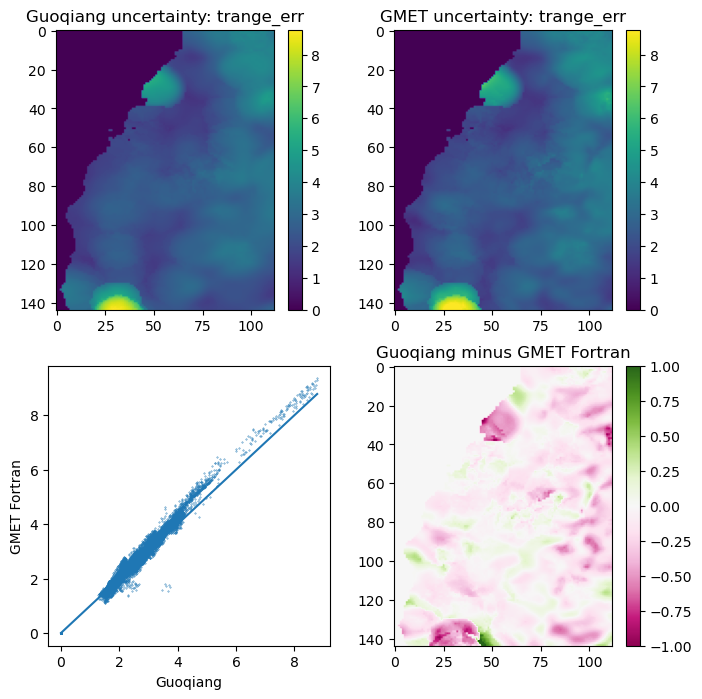

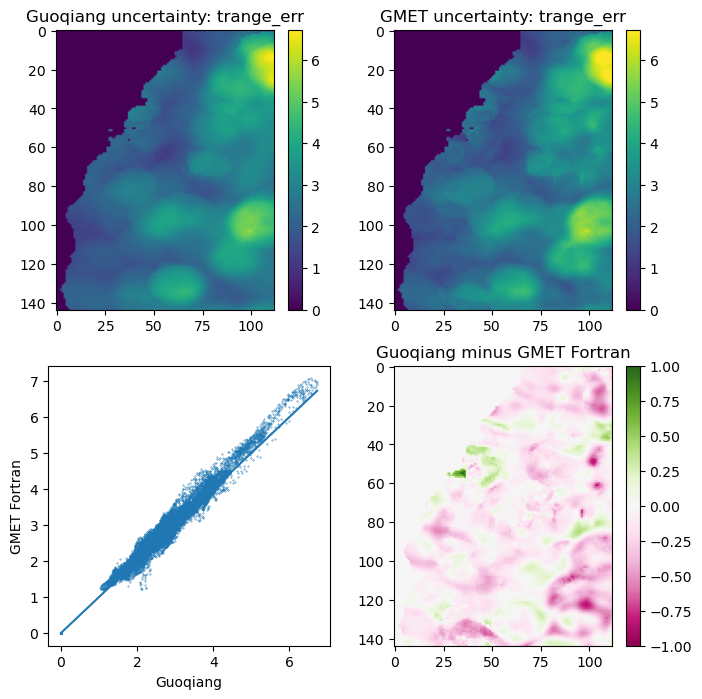

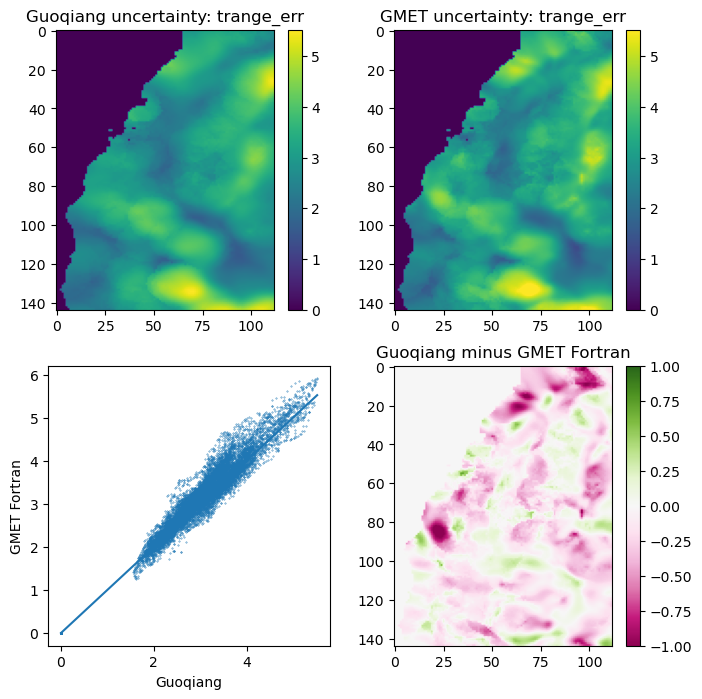

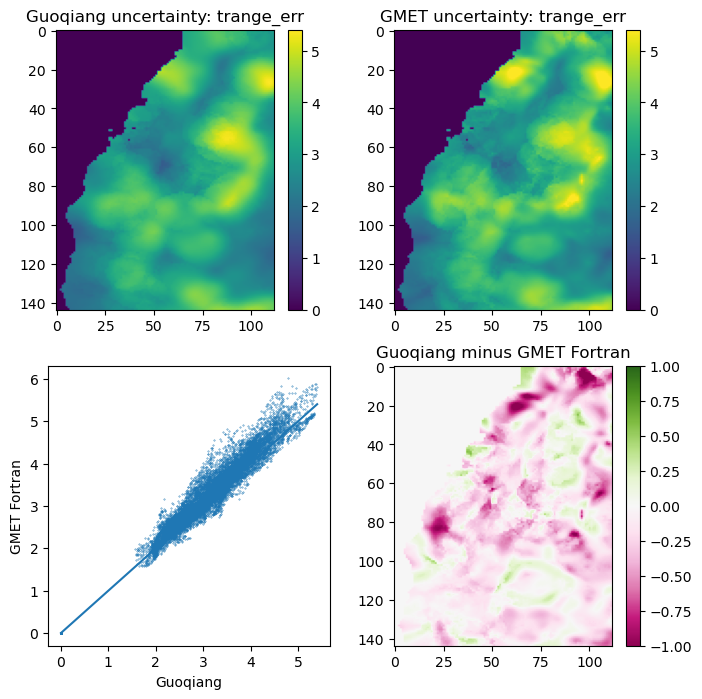

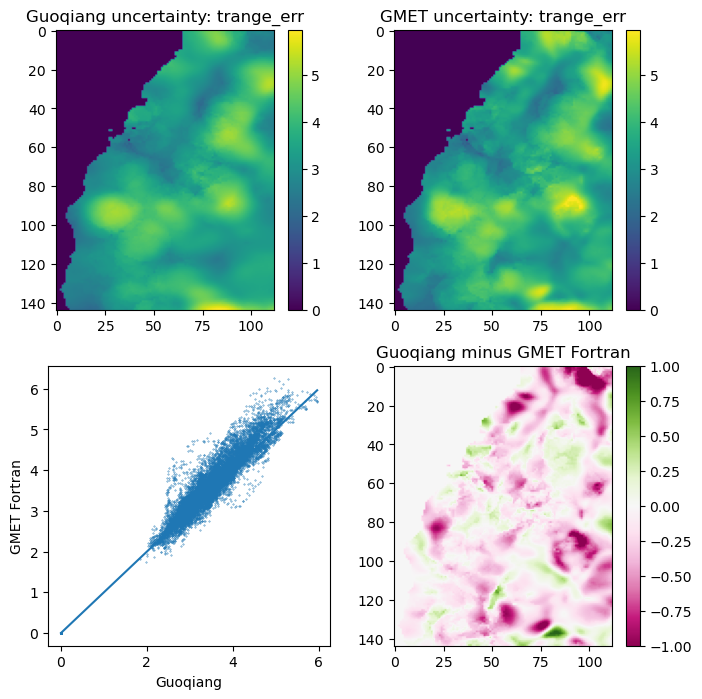

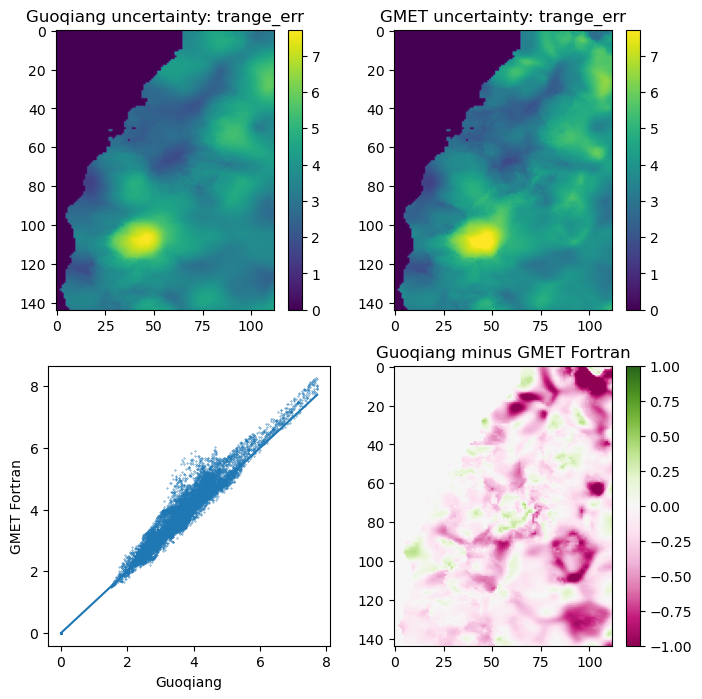

In [27]:

outpath = './Andy_test_case1'
varname = 'trange_err'
files = []
for t in range(15):

    dplot = ['', '']
    dplot[0] = data1[varname][:,:,t]
    dplot[1] = data2[varname][:,:,t]
    vmin = dplot[0].min()
    vmax = dplot[0].max()

    fig, axs = plt.subplots(2, 2,figsize=[8,8])
    axs = axs.flatten()
    
    titles = [f'Guoqiang uncertainty: {varname}', f'GMET uncertainty: {varname}']
    for i in range(2):
        p = axs[i].imshow(dplot[i], vmin=vmin, vmax=vmax)
        axs[i].set_title(titles[i])
        fig.colorbar(p, ax=axs[i])
        
    i=2
    axs[i].scatter(dplot[0], dplot[1], 0.1)
    axs[i].plot([vmin, vmax], [vmin, vmax])
    axs[i].set_xlabel('Guoqiang')
    axs[i].set_ylabel('GMET Fortran')
    
    i=3
    p = axs[i].imshow(dplot[0]-dplot[1], vmin=-1, vmax=1, cmap='PiYG')
    axs[i].set_title('Guoqiang minus GMET Fortran')
    fig.colorbar(p, ax=axs[i])   
        

    plt.savefig(f'{outpath}/{varname}{t}.png')
    files.append(f'{outpath}/{varname}{t}.png')
    
# Build GIF
with imageio.get_writer(f'{outpath}/{varname}.gif', mode='I', fps=1) as writer:
    for filename in files:
        image = imageio.imread(filename)
        writer.append_data(image)
        os.remove(filename)

/var/folders/pf/n30tfn0j0n93dr81jm369hyc0000gp/T/ipykernel_23474/3001429656.py:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


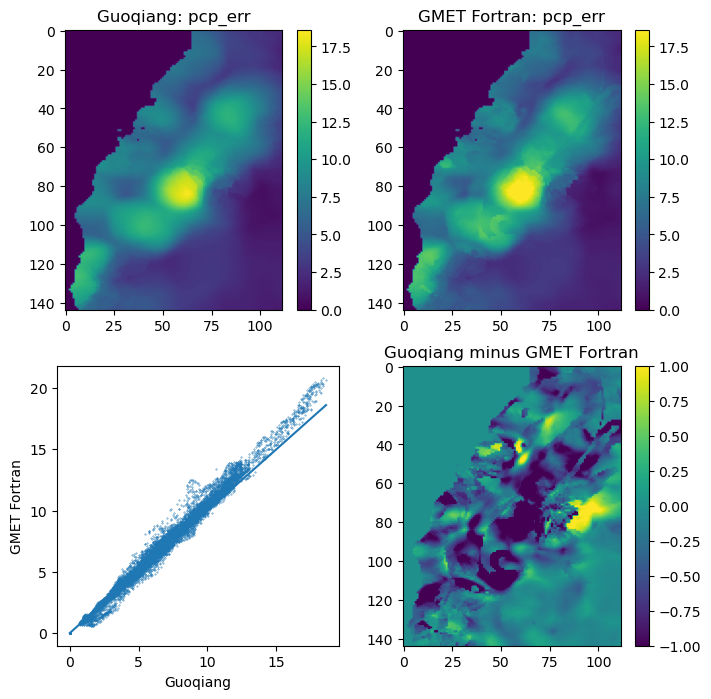

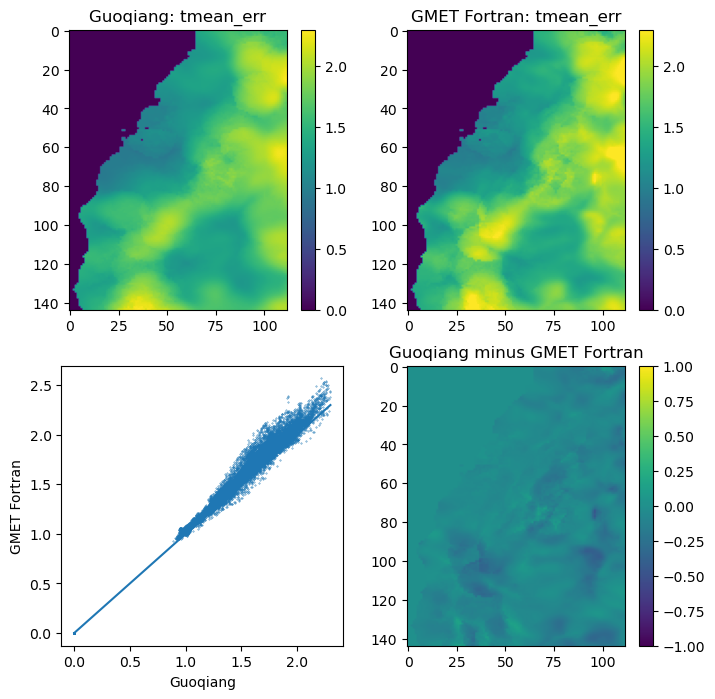

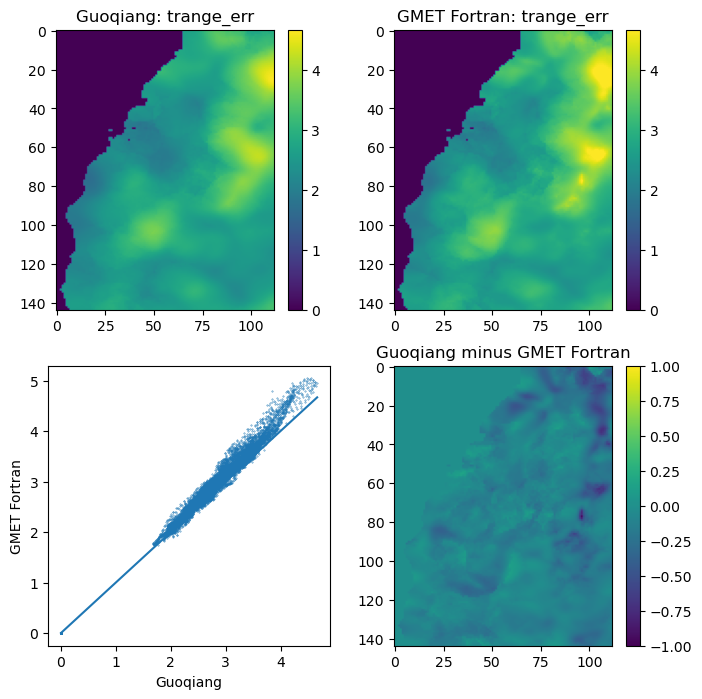

In [21]:
# time average diff


outpath = './Andy_test_case1'


files = []
for varname in ['pcp_err', 'tmean_err', 'trange_err']:

    dplot = ['', '']
    dplot[0] = np.mean(data1[varname], axis=2)
    dplot[1] = np.mean(data2[varname], axis=2)
    vmin = dplot[0].min()
    vmax = dplot[0].max()

    fig, axs = plt.subplots(2, 2, figsize=[8, 8])
    axs = axs.flatten()

    titles = [f'Guoqiang: {varname}', f'GMET Fortran: {varname}']
    for i in range(2):
        p = axs[i].imshow(dplot[i], vmin=vmin, vmax=vmax)
        axs[i].set_title(titles[i])
        fig.colorbar(p, ax=axs[i])

    i = 2
    axs[i].scatter(dplot[0], dplot[1], 0.1)
    axs[i].plot([vmin, vmax], [vmin, vmax])
    axs[i].set_xlabel('Guoqiang')
    axs[i].set_ylabel('GMET Fortran')

    i = 3
    p = axs[i].imshow(dplot[0] - dplot[1], vmin=-1, vmax=1, cmap='PiYG')
    axs[i].set_title('Guoqiang minus GMET Fortran')
    fig.colorbar(p, ax=axs[i])   
    
    
    plt.savefig(f'{outpath}/{varname}_timemean.png')
    files.append(f'{outpath}/{varname}_timemean.png')
    
    
# Build GIF
with imageio.get_writer(f'{outpath}/allvar_timemean.gif', mode='I', fps=1) as writer:
    for filename in files:
        image = imageio.imread(filename)
        writer.append_data(image)
        os.remove(filename)

